In [1]:
### 데이터 불러들이기
# - 변수 : wine
# - 데이터 : 08_wine.csv

import pandas as pd

file_path = "./data/08_wine.csv"
wine = pd.read_csv(file_path)
wine

# - alcohol : 알콜도수
# - sugar :  당도
# - pH : 농도
# - class : 와인종류(0:레드와인, 1:화이트와인)

# 독립변수 : alcohol, sugar, pH
# 종속변수 : class
# - 종속변수가 이진분류인 경우 찾고자 하는 값은 1을 기준으로 합니다.

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [2]:
### 독립변수와 종속변수 추출하기
# 독립변수 : data, 종속변수 : target 변수 사용
data = wine[["alcohol", "sugar", "pH"]].to_numpy()

# 종속변수 : fish_target
target = wine["class"].to_numpy()

data.shape, target.shape

((6497, 3), (6497,))

In [3]:
### 훈련 및 테스트 데이터 분류 : 8:2로 분류
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
              train_test_split(data, target,  
                               test_size=0.2, random_state=42)

train_input.shape, train_target.shape, test_input.shape, test_target.shape

((5197, 3), (5197,), (1300, 3), (1300,))

In [4]:
### 정규화하기
# - train_scaled, test_scaled

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
train_scaled.shape, test_scaled.shape

((5197, 3), (1300, 3))

# 로지스틱 회귀로 분류 먼저 해보기(비교대상)

In [5]:
### - 훈련 및 정확도 확인 후 예측까지..
### - 예측은 전체 데이터를 이용해서..
### - 정답률과 오답률 최종 확인하기

In [6]:
### 패키지
from sklearn.linear_model import LogisticRegression

In [7]:
### 클래스(모델) 생성하기
lr = LogisticRegression()
lr

LogisticRegression()

In [8]:
### 훈련시키기
lr.fit(train_scaled, train_target)

LogisticRegression()

In [9]:
### 정확도 확인하기 
train_scroe = lr.score(train_scaled, train_target) 
test_scroe = lr.score(test_scaled, test_target) 
train_scroe, test_scroe

(0.7808350971714451, 0.7776923076923077)

In [10]:
### 전체 데이터 예측
predict_data = wine[["alcohol", "sugar", "pH"]].to_numpy()


### 훈련데이터를 이용해서 정규화한 객체를 그대로 사용하는 것이 정석
predict_scaled = ss.transform(predict_data)
predict_scaled

array([[-0.90962693, -0.7446989 ,  1.83597265],
       [-0.57384778, -0.59874763, -0.10623192],
       [-0.57384778, -0.66129818,  0.26967864],
       ...,
       [-0.90962693, -0.89065017, -1.4219189 ],
       [ 1.94449586, -0.91150035,  0.77089272],
       [ 1.10504798, -0.97405089,  0.26967864]])

In [11]:
### 전체 독립변수 예측하기
result_predict = lr.predict(predict_scaled)

wine_pred = wine[["alcohol", "sugar", "pH", "class"]]
wine_pred["class_pred"] = result_predict

o_cnt = len(wine_pred[wine_pred["class"] == wine_pred["class_pred"]]) 
x_cnt = len(wine_pred[wine_pred["class"] != wine_pred["class_pred"]])  
all_cnt = len(wine_pred)  

import numpy as np

o_p = np.round(o_cnt / all_cnt * 100, 2)  
x_p = np.round(x_cnt / all_cnt * 100, 2) 

print("총 100% 중 정답률[{}%] / 오답률[{}%]".format(o_p, x_p))

총 100% 중 정답률[78.02%] / 오답률[21.98%]


# 결정트리(Decision Tree)

In [12]:
"""
- 질문(조건)을 통해서 트리(True or False) 2개씩 가지를 치면서 분류함
- root node가 나무라고 생각하시면 됩니다.
- 질문을 스스로 찾아서 계속해서 질문(조건)을 만들어 나가면서 분류(트리)함
- 더 이상 질문이 없으면 결정(Decision)하게 됨
- 분류 정확도가 높음
- 질문(조건)을 통해서 분류해 나가는 절차를 시각화 가능
- 분류 모델은 결정트리 개념을 대부분 적용하고 있음
"""

'\n- 질문(조건)을 통해서 트리(True or False) 2개씩 가지를 치면서 분류함\n- root node가 나무라고 생각하시면 됩니다.\n- 질문을 스스로 찾아서 계속해서 질문(조건)을 만들어 나가면서 분류(트리)함\n- 더 이상 질문이 없으면 결정(Decision)하게 됨\n- 분류 정확도가 높음\n- 질문(조건)을 통해서 분류해 나가는 절차를 시각화 가능\n- 분류 모델은 결정트리 개념을 대부분 적용하고 있음\n'

In [13]:
### 라이브러리 불러들이기
from sklearn.tree import DecisionTreeClassifier

In [14]:
### 모델(클래스) 생성하기
dt = DecisionTreeClassifier(random_state=42)
dt

DecisionTreeClassifier(random_state=42)

In [15]:
### 훈련시키기
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [16]:
### 평가하기(정확도)
train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)
train_score, test_score

(0.996921300750433, 0.8592307692307692)

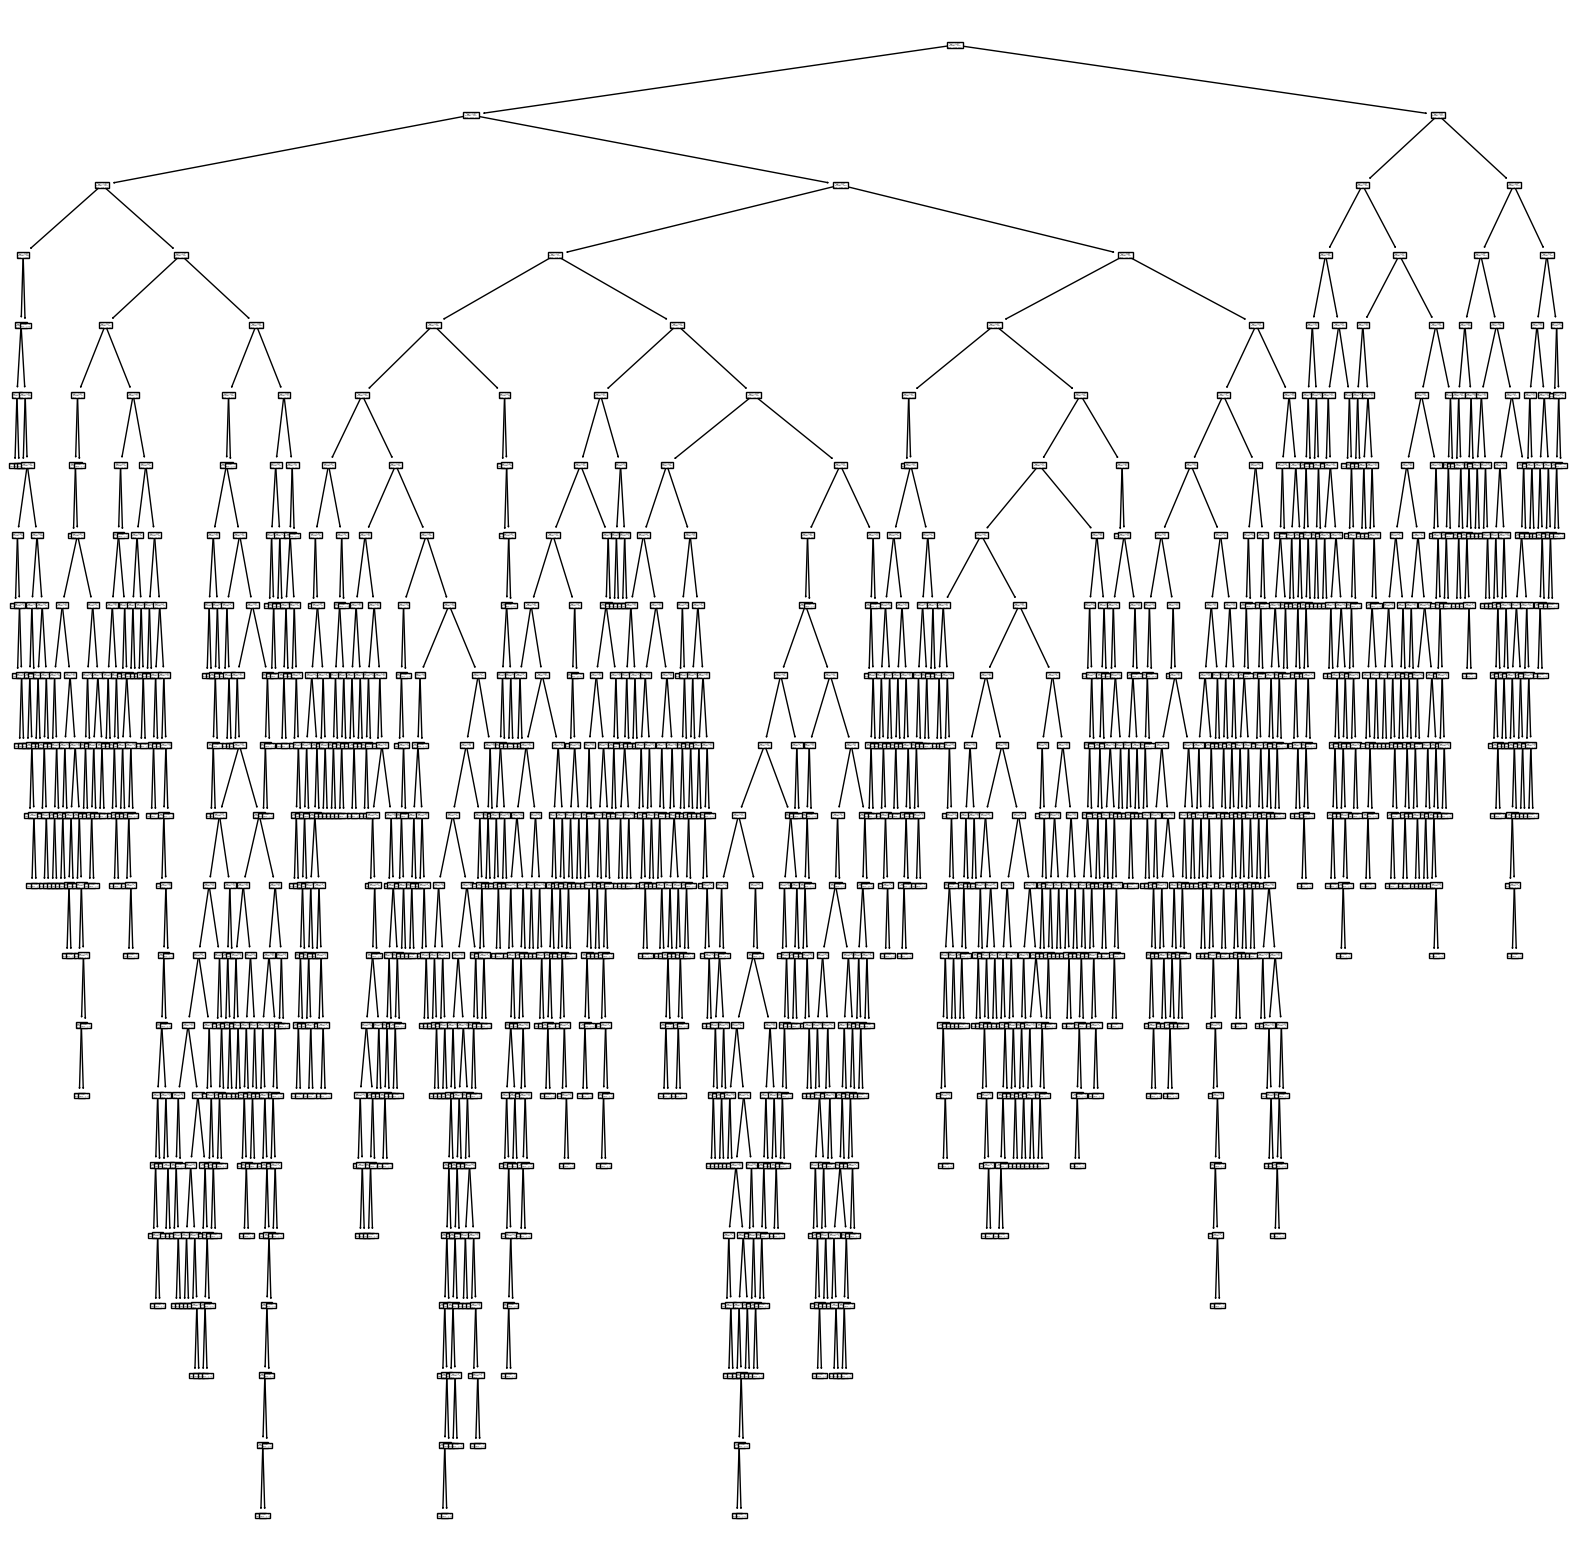

In [17]:
### 결정트리는 시각화 표현을 해주는 라이브러리가 있음
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

### 그래프 사이즈 (너비, 높이)
plt.figure(figsize=(20,20))
plot_tree(dt)
plt.show()

### 가장 위에 있는 시작점(노드, node)를 : 루트 노드(root node)라고 칭함
# - 가장 하단에 위치한 노드들을 : 리프 노드(leaf node)라고 칭함

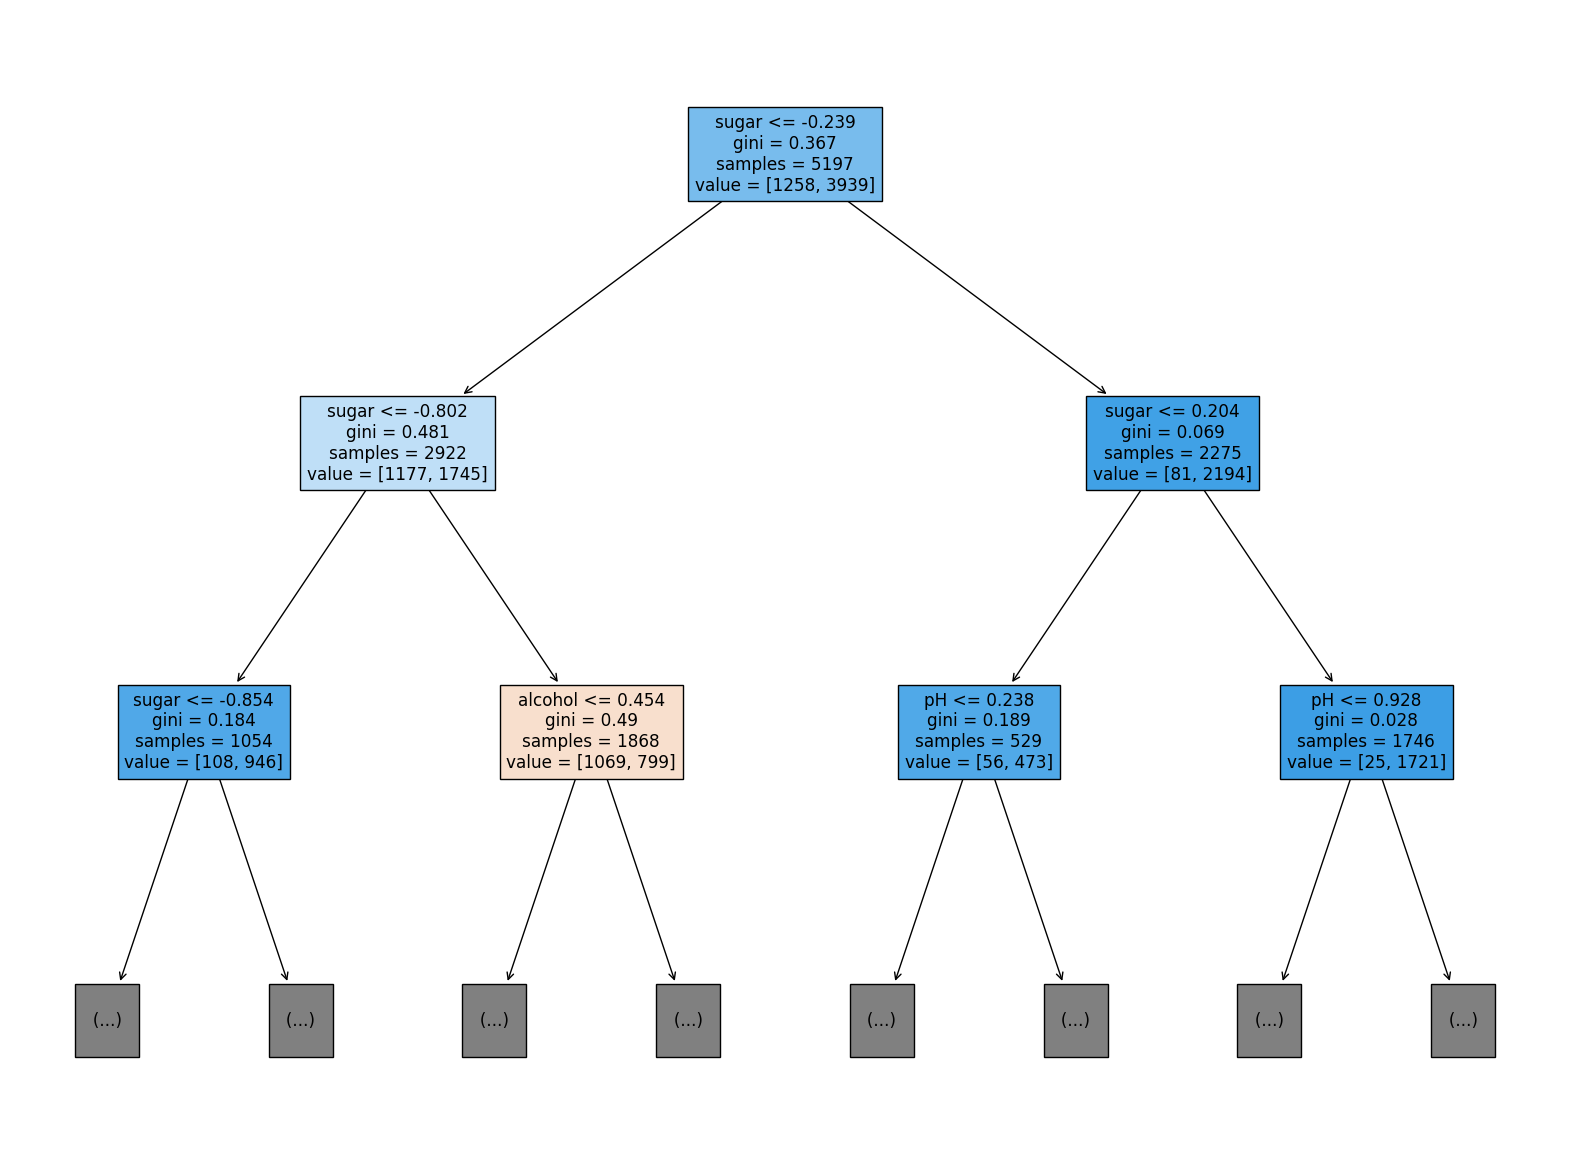

In [18]:
### 노드의 깊이를 정해서 : 노드의 값을 확인하기 위해
# - max_depth : root node를 제외한 깊이 갯수
# - filled : 트리가 구분되면서 독립변수별로 색상으로 구분하기 위해 설정
plt.figure(figsize=(20,15))
plot_tree(dt, max_depth=2, filled=True,
          feature_names=["alcohol", "sugar", "pH"])
plt.show()

# - 첫번째 값 : 테스트 조건(모델이 임의로 선정, if조건)
# - gini : 불순도(0에 가가울수록 정확도가 떨어짐)
#        : 불순도가 낮아질때까지 가지가 뻗어나가게 됨
# - samples :  테스트에 사용된 총 데이터 건수
# - value : 범주(종속변수)별로 테스트에 사용된 데이터 갯수

### 가지치기(max_depth :  트리의 갯수 제한)

In [19]:
"""
- 트리가 너무 뻣어 나간다고 해서 정확도가 높아지지는 않음
- 오히려 정확도가 떨어질 수도 있음
- 트리가 뻣어 나가는 것(성장이라고 함)을 제한하는 속성 : max_depth
- max_depth : 사람이 결정함(하이퍼파라메터 튜닝 필요)
"""

'\n- 트리가 너무 뻣어 나간다고 해서 정확도가 높아지지는 않음\n- 오히려 정확도가 떨어질 수도 있음\n- 트리가 뻣어 나가는 것(성장이라고 함)을 제한하는 속성 : max_depth\n- max_depth : 사람이 결정함(하이퍼파라메터 튜닝 필요)\n'

In [20]:
### max_depth = 3 :  루트노드를 제외하고 3개 노드까지 만들기
# - 3개 depth까지 수행되기 전에 리프노드(결정)가 결정되면 끝남
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

### 평가하기(정확도)
train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)
train_score, test_score

(0.8454877814123533, 0.8415384615384616)

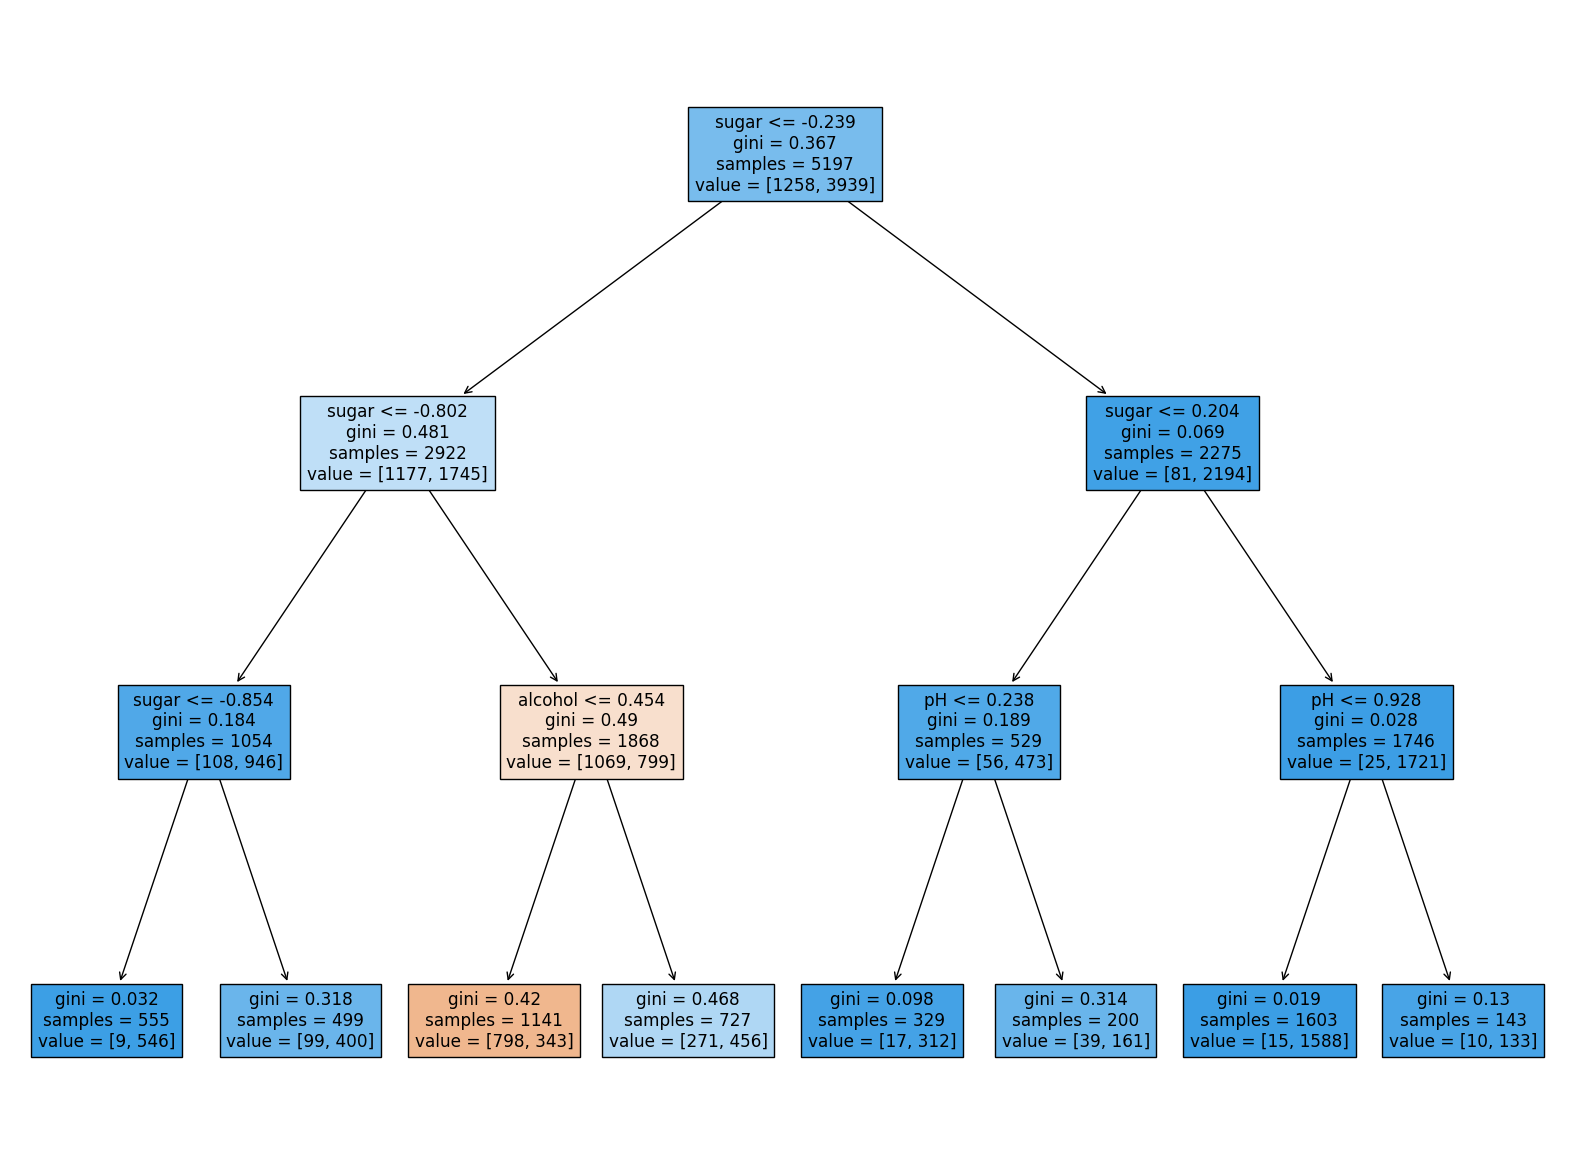

In [21]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True,
          feature_names=["alcohol", "sugar", "pH"])
plt.show()

### 특성 중요도에 따른 특성 제외하여 훈련

In [22]:
### 알콜, 당도, 농도의 특성 중에 훈련에 영향을 어느정도 미치고 있는지 확인
# - 훈련에 사용된 특성 중 영향을 가장 많이 미치는 특성이 루트노드에 사용됨
#   (훈련 모델이 결정함)
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

### pH 특성을 제외하고 훈련시키기

In [23]:
### 독립변수와 종속변수 추출하기
# 독립변수 : data, 종속변수 : target 변수 사용
data = wine[["alcohol", "sugar"]].to_numpy()
# target은 기존과 동일

data.shape 

(6497, 2)

In [24]:
### 훈련 및 테스트 데이터 분류 : 8:2로 분류
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
              train_test_split(data, target,  
                               test_size=0.2, random_state=42)

train_input.shape, train_target.shape, test_input.shape, test_target.shape

((5197, 2), (5197,), (1300, 2), (1300,))

In [25]:
### 정규화하기
# - train_scaled, test_scaled

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
train_scaled.shape, test_scaled.shape

((5197, 2), (1300, 2))

In [26]:
### 모델(클래스) 생성하기
dt = DecisionTreeClassifier(max_depth=3, random_state=3)
dt

DecisionTreeClassifier(max_depth=3, random_state=3)

In [27]:
### 훈련시키기
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=3)

In [28]:
### 평가하기(정확도)
train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)
train_score, test_score

### pH 특성을 사용할때와 사용하지 않을때 모두 동일한 훈련결과가 나옴
# - pH 특성은 훈련에 영향을 미치지 않는것으로 판단하여 제외시킴
# - 시스템 성능 향상에 도움이 될 수 있음

(0.8454877814123533, 0.8415384615384616)

# 상관관계 확인

In [29]:
wine.corr(method="pearson")

### class를 기준으로 3개 특성 확인(값은 상관계수)
# - class vs alcohol
# - class vs sugar
# - class vs pH

### 1에 가까울수록 양의 선형 관계(우상향 = 정비례)
### -1에 가까울수록 음의 선형 관계 (우하향 = 반비례)
### 0에 가가울수록 선형 관계를 갖지 않음
### 상관관계는 절대값을 기준으로 먼저 확인
#   - 이후 음양의 관계를 확인함

,alcohol,sugar,pH,class
alcohol,1.000000,-0.359415,0.121248,0.032970
sugar,-0.359415,1.000000,-0.267320,0.348821
pH,0.121248,-0.267320,1.000000,-0.329129
class,0.032970,0.348821,-0.329129,1.000000


In [30]:
# ----- 내가 정리한 해석 -----
# 상관관계를 분석 후 변수 중요도를 체크한 후 변수를 픽스
# 모든 변수를 가지고 훈련한 결과와 중요도가 낮은 변수를 제외하고 훈련한 결과 비교
# 정확도가 동일하다면 해당 변수는 모델에 영향을 미치지 못하므로 제외시킴 

### 전체 데이터를 이용하여 예측하기

In [31]:
### 전체 데이터 추출
# 정답률과 오답률 확인하기

In [32]:
### 전체 데이터 예측
predict_data = wine[["alcohol", "sugar"]].to_numpy()


### 훈련데이터를 이용해서 정규화한 객체를 그대로 사용하는 것이 정석
predict_scaled = ss.transform(predict_data)
predict_scaled

array([[-0.90962693, -0.7446989 ],
       [-0.57384778, -0.59874763],
       [-0.57384778, -0.66129818],
       ...,
       [-0.90962693, -0.89065017],
       [ 1.94449586, -0.91150035],
       [ 1.10504798, -0.97405089]])

In [33]:
### 전체 독립변수 예측하기
result_predict = dt.predict(predict_scaled)

wine_pred = wine[["alcohol", "sugar", "pH", "class"]]
wine_pred["class_pred"] = result_predict

o_cnt = len(wine_pred[wine_pred["class"] == wine_pred["class_pred"]]) 
x_cnt = len(wine_pred[wine_pred["class"] != wine_pred["class_pred"]])  
all_cnt = len(wine_pred)  

import numpy as np

o_p = np.round(o_cnt / all_cnt * 100, 2)  
x_p = np.round(x_cnt / all_cnt * 100, 2) 
sum_p = o_p + x_p
 
print("총 {}% 중 정답률[{}%] / 오답률[{}%]".format(sum_p, o_p, x_p))

총 100.0% 중 정답률[84.47%] / 오답률[15.53%]


In [34]:
# LogisticRegression : 총 100% 중 정답률[78.02%] / 오답률[21.98%]
# DecisionTree : 총 100.0% 중 정답률[84.47%] / 오답률[15.53%]
# -> DecisionTree 선택

# 와인 전체 특성을 사용하여 연습하기

In [35]:
### 사이킷런에서 제공하는 데이터셋 사용
from sklearn.datasets import load_wine

In [36]:
### 데이터셋 읽어 들이기
wine_all = load_wine()
wine_all

### 딕셔너리 타입으로 가지고 옵니다.
# - 특성 이름을 담고 있는 key값 : feature_names
# - 특성 데이터를 담고 있는 key값 : data
# - 종속변수(범주-와인의 종류)를 담고 있는 key값 : target_names
#   -- 종속변수 : class_0 과 class_1 (0과 1로 변경하여 사용해야 함)
#   -- 0은 레드와인, 1은 화이트와인

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [37]:
###########################################################
### --- 내가 해본거 ------------------------------

In [38]:
# 와인 데이터에서 feature 로 되어있는 데이터를 갖고 온다.
wine_data = wine_all.data

In [39]:
# 와인 데이터에서 target 데이터를 갖고온다.
wine_target = wine_all.target

In [40]:
# wine 데이터의 feature, target로 Dataframe을 만든다.
df_wine = pd.DataFrame(data = wine_data, columns=[wine_all.feature_names])

In [41]:
# feature 만 있는 데이터 프레임에 타겟 데이터를 추가한다.
df_wine['target'] = wine_all.target
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [42]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
              train_test_split(wine_data, wine_target,  
                               test_size=0.25, random_state=42)

train_input.shape, train_target.shape, test_input.shape, test_target.shape

((133, 13), (133,), (45, 13), (45,))

In [43]:
### 독립변수 정규화하기
from sklearn.preprocessing import StandardScaler

### 클래스(객체) 생성
ss = StandardScaler()
### 표준화를 위한 점수를 생성하기 위한 패턴 찾기
ss.fit(train_input)

### 찾은 패턴으로 데이터 변환하기
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

train_scaled.shape, test_scaled.shape

((133, 13), (45, 13))

In [44]:
### 로지스틱 회귀로 분류

### 패키지
from sklearn.linear_model import LogisticRegression

### 클래스(모델) 생성하기
lr = LogisticRegression()
lr

### 훈련시키기
lr.fit(train_scaled, train_target)

### 정확도 확인하기 
train_scroe = lr.score(train_scaled, train_target) 
test_scroe = lr.score(test_scaled, test_target) 
train_scroe, test_scroe

(1.0, 0.9777777777777777)

In [45]:
### 결정트리(Decision Tree)

### 라이브러리 불러들이기
from sklearn.tree import DecisionTreeClassifier

### 모델(클래스) 생성하기
dt = DecisionTreeClassifier(random_state=42)
dt

### 훈련시키기
dt.fit(train_scaled, train_target)

### 평가하기(정확도)
train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)
train_score, test_score

(1.0, 0.9555555555555556)

In [46]:
### 상관관계 확인
df_wine.corr(method="pearson")

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [47]:
### 특성 중요도 
dt.feature_importances_

array([0.01998197, 0.        , 0.02235065, 0.        , 0.        ,
       0.        , 0.41589367, 0.        , 0.        , 0.40331707,
       0.        , 0.        , 0.13845664])

In [48]:
### 중요도가 0인 특성을 제외하고 훈련시키기
### 독립변수와 종속변수 추출하기
df_wine_re = df_wine[['alcohol', 'ash',  'flavanoids',  'color_intensity',   'proline']]
# target은 기존과 동일

In [49]:
### 훈련 및 테스트 데이터 분류  
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
              train_test_split(df_wine_re, wine_target,  
                               test_size=0.25, random_state=42)

train_input.shape, train_target.shape, test_input.shape, test_target.shape


((133, 5), (133,), (45, 5), (45,))

In [50]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
train_scaled.shape, test_scaled.shape 

((133, 5), (45, 5))

In [51]:
### 독립변수 정규화하기
from sklearn.preprocessing import StandardScaler

### 클래스(객체) 생성
ss = StandardScaler()
### 표준화를 위한 점수를 생성하기 위한 패턴 찾기
ss.fit(train_input)

### 찾은 패턴으로 데이터 변환하기
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

train_scaled.shape, test_scaled.shape

((133, 5), (45, 5))

In [52]:
### 로지스틱 회귀로 분류

### 패키지
from sklearn.linear_model import LogisticRegression

### 클래스(모델) 생성하기
lr = LogisticRegression()
lr

### 훈련시키기
lr.fit(train_scaled, train_target)

### 정확도 확인하기 
train_scroe = lr.score(train_scaled, train_target) 
test_scroe = lr.score(test_scaled, test_target) 
train_scroe, test_scroe

(0.9774436090225563, 1.0)

In [53]:
### 결정트리(Decision Tree)

### 라이브러리 불러들이기
from sklearn.tree import DecisionTreeClassifier

### 모델(클래스) 생성하기
dt = DecisionTreeClassifier(random_state=42)
dt

### 훈련시키기
dt.fit(train_scaled, train_target)

### 평가하기(정확도)
train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)
train_score, test_score

(1.0, 0.9555555555555556)

In [54]:
# 타겟값이 0, 1, 2 있어서 그중 0, 1만 갖어다 활용했어야할거 같음
# 8day_회귀_분류/02_이진분류_다중분류_로지스틱회귀분류.ipynb 참고하면 될듯함

# 강사님 요청 : max_depth 튜닝을 위해 for문으로 max_depth별 그래프 그려보기 해보세요.

### --- 내가 해본거 여기까지 ------------------------------
###########################################################

In [55]:
train_list = []
test_list = []
for i in range(1, 11, 1) :
    dt = DecisionTreeClassifier(max_depth = i, random_state = 42)
    dt.fit(train_scaled, train_target)
    train_list.append(dt.score(train_scaled, train_target))
    test_list.append(dt.score(test_scaled, test_target))

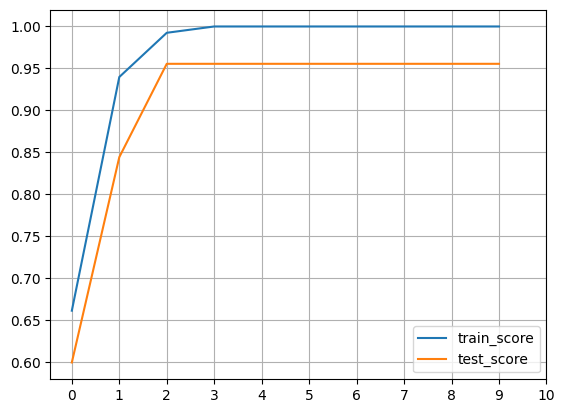

In [57]:
import matplotlib.pyplot as plt

plt.plot(train_list, label="train_score")
plt.plot(test_list, label="test_score")
plt.legend()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.grid()
plt.show()


In [ ]:
"""
< 특성을 제외시키기 위해 증명하는 순서 >
1. 원본 데이터를 사용하여 상관관계 계수 확인(통계적 개념)
   - 의미적으로만 확인
2. 훈련시킴
3. 특성 중요도 확인
   - 특성 결정(빅데이터 개념)
4. 최종 특성을 사용할지 여부는 특성 중요도를 기준으로 선택   
"""